#### 获取需要的数据

In [4]:
import pandas as pd

file_path = '/mnt/cfdp/CFDP_noniid_a16_rho65_1.log'

with open(file_path) as f:
    for line in  f.readlines():
        if 'Server Round' in line:
            print(line)
        # if 'Backdoor' in line:
        #     print(line)
        # if 'Weight Flip' in line:
        #     print(line)
        # if 'Backdoor Replace':
        #     print(line)
        # if 'Backdoor Pixel':
        #     print(line)
        if 'Attack type:' in line:
            print(line)
        # if 'densty:' in line:
        #     print(line)
        if 'Rubost Attack' in line:
            print(line)
        if 'normal_id:' in line:
            print(line)
        if 'attack_id:' in line:
            print(line)


normal_id:tensor([16, 17, 18, 19])

attack_id:tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Server Round: 1	 Test_Acc: 0.10000 	 Test_Loss: 46.09177

Attack type: pixel	 Acc: 0.0	 Loss: 46.431041955947876 

normal_id:tensor([16, 17, 18, 19])

attack_id:tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Server Round: 2	 Test_Acc: 0.10000 	 Test_Loss: 46.08838

Attack type: pixel	 Acc: 0.0	 Loss: 46.334492921829224 

normal_id:tensor([16, 17, 18, 19])

attack_id:tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Server Round: 3	 Test_Acc: 0.10000 	 Test_Loss: 46.08621

Attack type: pixel	 Acc: 0.0	 Loss: 46.21745753288269 

normal_id:tensor([16, 17, 18, 19])

attack_id:tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Server Round: 4	 Test_Acc: 0.10010 	 Test_Loss: 46.08462

Attack type: pixel	 Acc: 0.0	 Loss: 46.08262085914612 

normal_id:tensor([16, 17, 18, 19])

attack_id:tensor([ 0,  1, 

In [9]:
k = [5, 2, 3, 6, 2, 4, 3, 6, 4, 9, 2, 8, 3, 5, 2, 1, 3, 2, 4, 2]
sum(k)/20

3.8

#### 提取数据

In [28]:
import pandas as pd
def ex_data(file_path):
    data = pd.DataFrame()
    normal_id = []
    attack_id = []
    round_now = []
    with open(file_path) as f:
        for i,line in  enumerate(f.readlines()):
            if i%8 == 0:
                normal_id.append(eval(line[17:-2]))
            if i%8 == 2:
                attack_id.append(eval(line[17:-2]))
            if i%8==4:
                round_now.append(eval(line[14:17]))
    l = int(len(round_now)/4)
    attack_tp = ['replace']*l + ['pixel']*l + ['label']*l + ['weight']*l
    data['attack_tp'] = attack_tp
    data['round_now'] = round_now
    data['normal_id'] = normal_id
    data['attack_id'] = attack_id
    return data

def TFNP(data):
    T = {6,7,8,9,10,11,12,13,14,15,16,17,18,19}
    F = {0,1,2,3,4,5}
    Acc = []
    Pre = []
    Rec = []
    
    for p_t,p_f in zip(data.normal_id,data.attack_id):
        pt,pf = set(p_t),set(p_f)
        TP = len(T&pt)
        FN = len(T&pf)
        FP = len(F&pt)
        TN = len(F&pf)
        acc = (TP + TN) / (TP + FN + FP + TN)
        pre = TP / (TP + FP)
        rec = TP / (TP + FN)
        Acc.append(acc)
        Pre.append(pre)
        Rec.append(rec)
    
    data['ACC'] = Acc
    data['PRE'] = Pre
    data['REC'] = Rec

    return Acc,Pre,Rec,data


path_iid = '/home/FedL/result/CFDP/cifar10_iid_12.log'  
path_noniid = '/home/FedL/result/CFDP/cifar10_noniid_12.log'   
data_iid = ex_data(path_iid)   
data_noniid = ex_data(path_noniid)  
a_iid,p_iid,r_iid,d_iid = TFNP(data_iid)
a_noniid,p_noniid,r_noniid,d_noniid = TFNP(data_noniid)

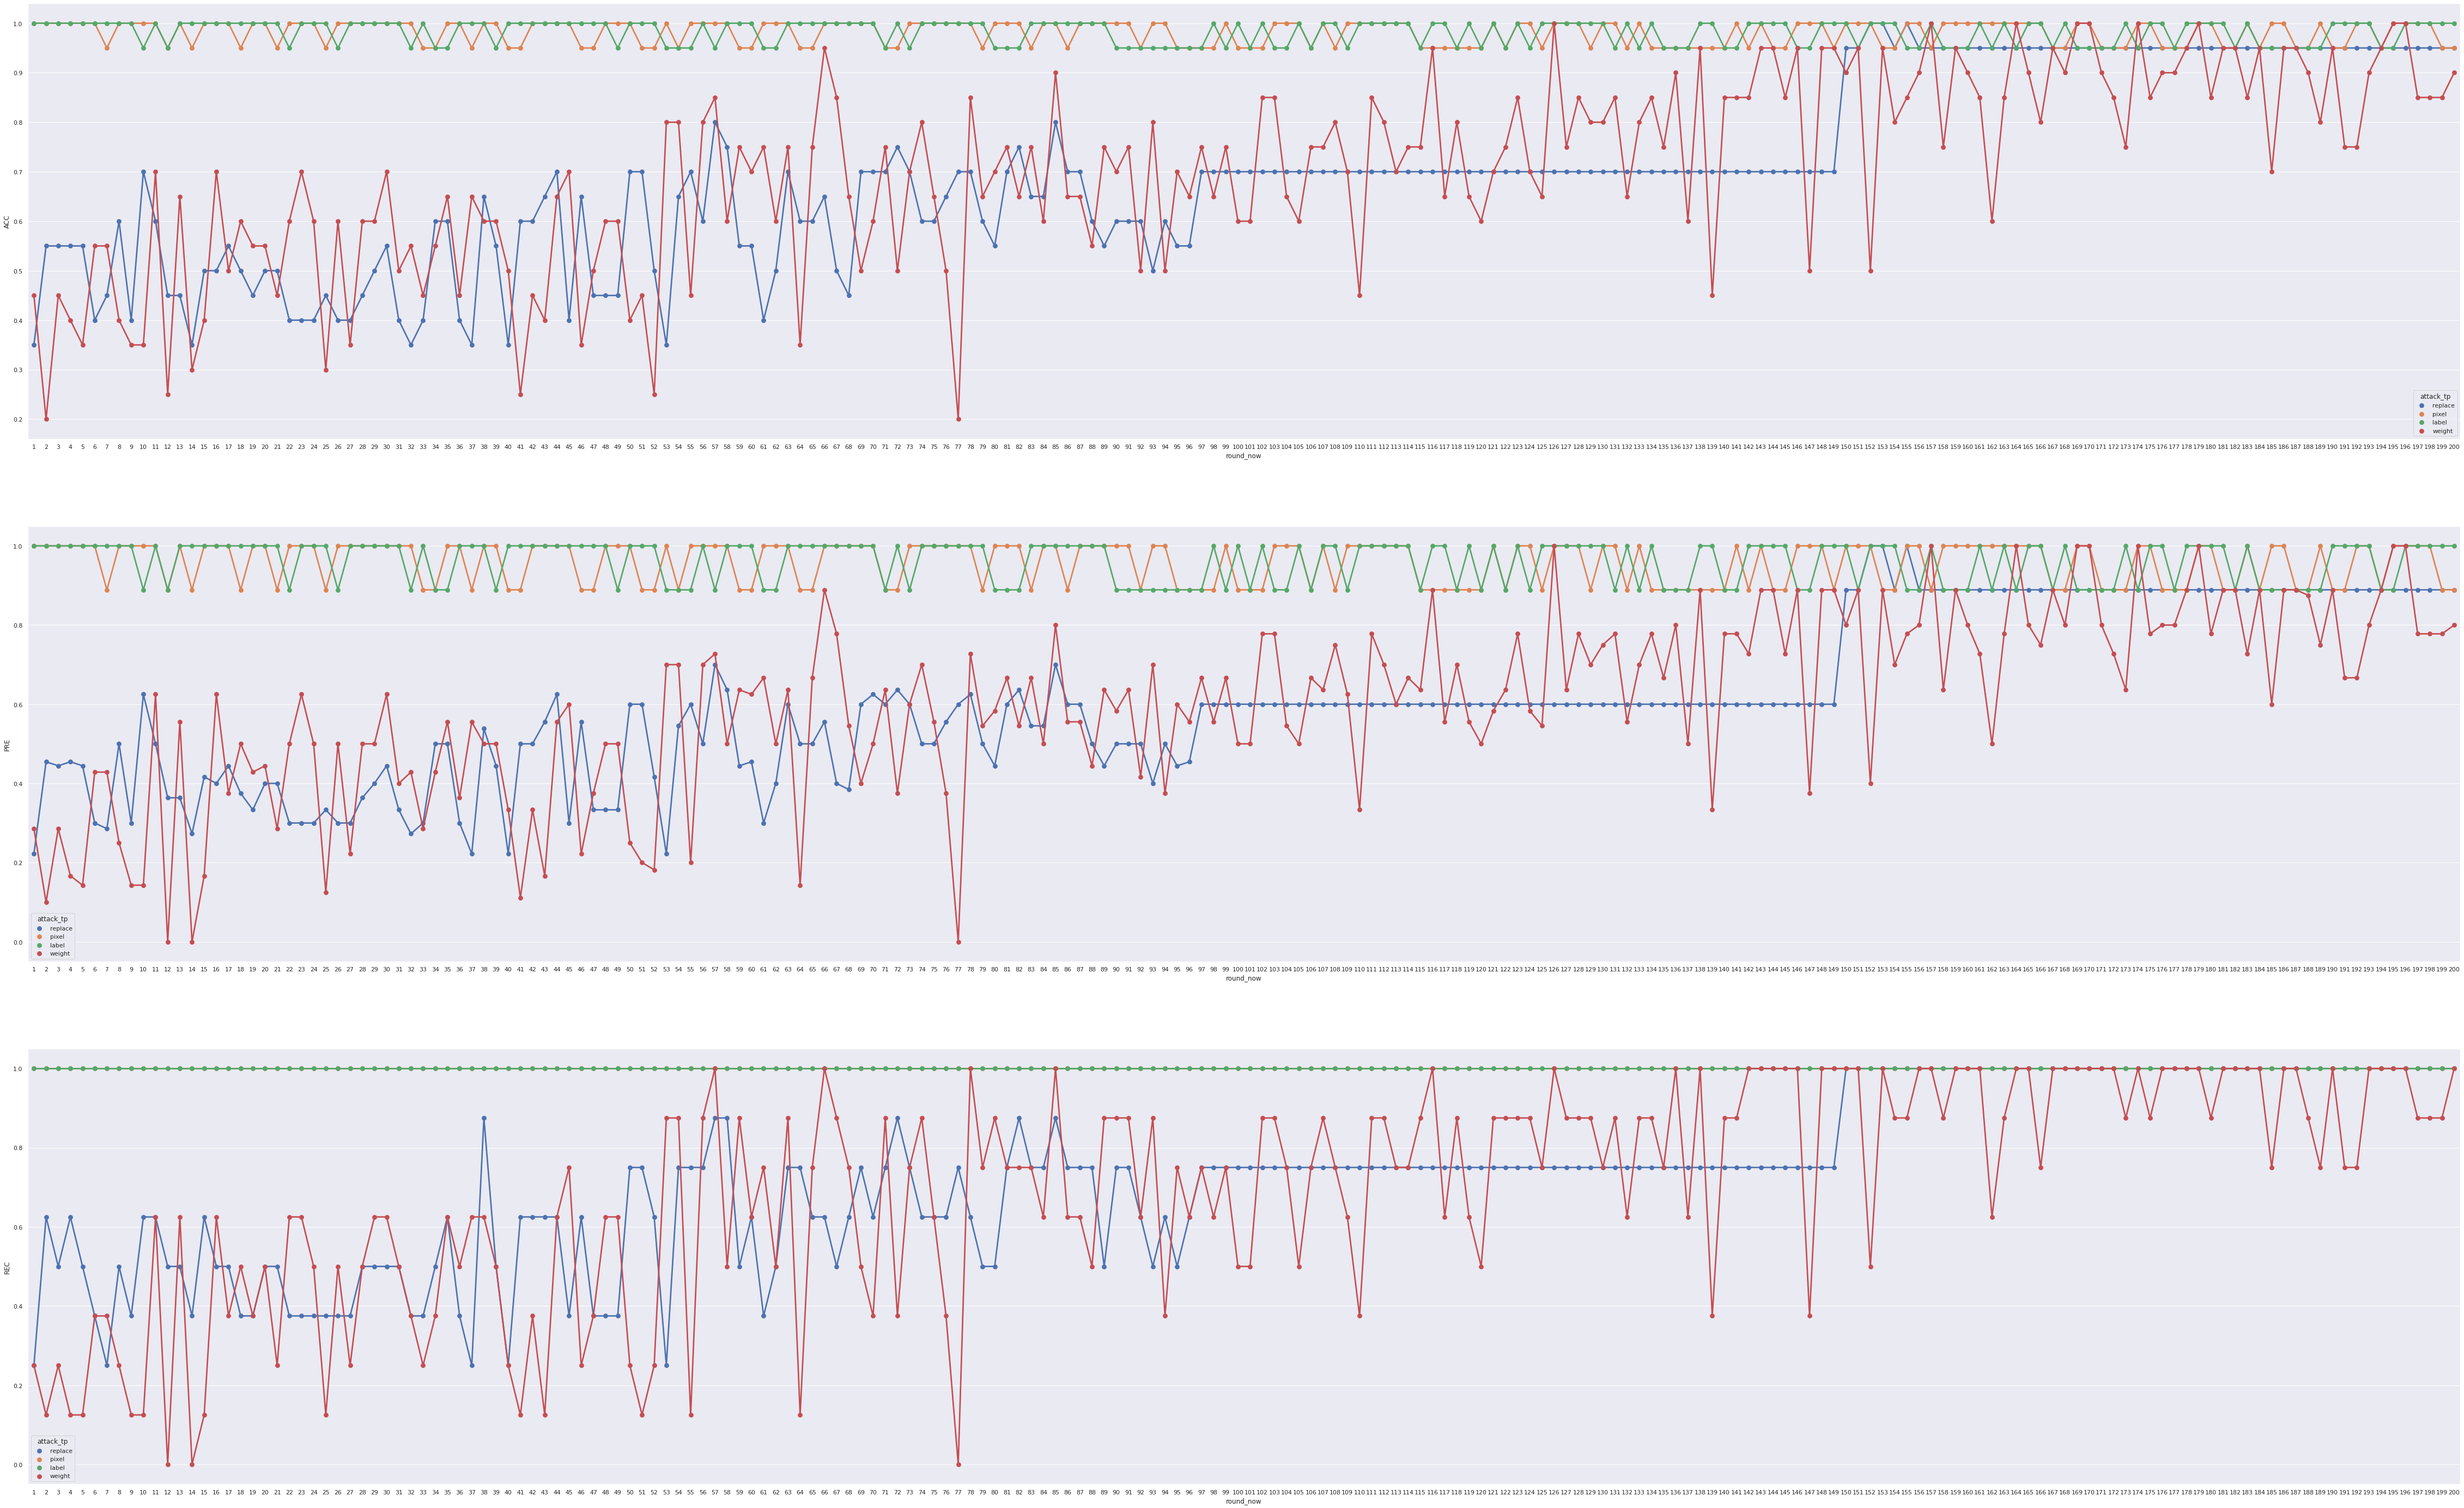

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
fig,axes = plt.subplots(3,1,figsize=(80,50))
d = d_iid
sns.pointplot(x='round_now',y='ACC',hue='attack_tp',data=d,ax=axes[0])
sns.pointplot(x='round_now',y='PRE',hue='attack_tp',data=d,ax=axes[1])
sns.pointplot(x='round_now',y='REC',hue='attack_tp',data=d,ax=axes[2])
plt.show()

In [5]:
import numpy as np
kk = np.load('/mnt/result/trainInfo/tt.npy',allow_pickle=True)
len(kk[0][2])

62006

In [20]:
import pandas as pd

kk = pd.read_csv('/mnt/result/trainInfo/tt.csv')

In [23]:
(kk['distM'][0])

'[[-1.19209288e-08  3.98274301e-01  4.14417826e-01  3.82192117e-01\n   4.03431496e-01  4.05235742e-01  1.32901613e+00  1.36562034e+00\n   1.33326204e+00  1.37320995e+00  1.35444558e+00  1.34983078e+00\n   1.35270854e+00  1.36274290e+00  1.34438708e+00  1.36805552e+00\n   1.37923766e+00  1.32288737e+00  1.31995163e+00  1.31536061e+00]\n [ 3.98274301e-01 -1.19209288e-08  3.75332982e-01  3.67806972e-01\n   3.78269483e-01  3.90573921e-01  1.30160140e+00  1.31862624e+00\n   1.29465497e+00  1.32611781e+00  1.29823272e+00  1.31502410e+00\n   1.30266844e+00  1.33968885e+00  1.29996604e+00  1.32288986e+00\n   1.33341091e+00  1.26530955e+00  1.29279748e+00  1.27142280e+00]\n [ 4.14417826e-01  3.75332982e-01 -1.19209288e-08  3.71263874e-01\n   3.81953570e-01  3.99474790e-01  1.31729574e+00  1.32536284e+00\n   1.29798974e+00  1.33577430e+00  1.31290155e+00  1.32343532e+00\n   1.31715985e+00  1.33320280e+00  1.31154757e+00  1.33553372e+00\n   1.33328686e+00  1.28145935e+00  1.28873856e+00  1.267389

round 1 M
round 10 M
round 20 M
round 30 M
round 40 M
round 50 M
round 60 M
round 70 M
round 80 M
round 90 M
round 100 M
round 110 M
round 120 M
round 130 M
round 140 M
round 150 M
round 160 M
round 170 M
round 180 M
round 190 M
round 200 M


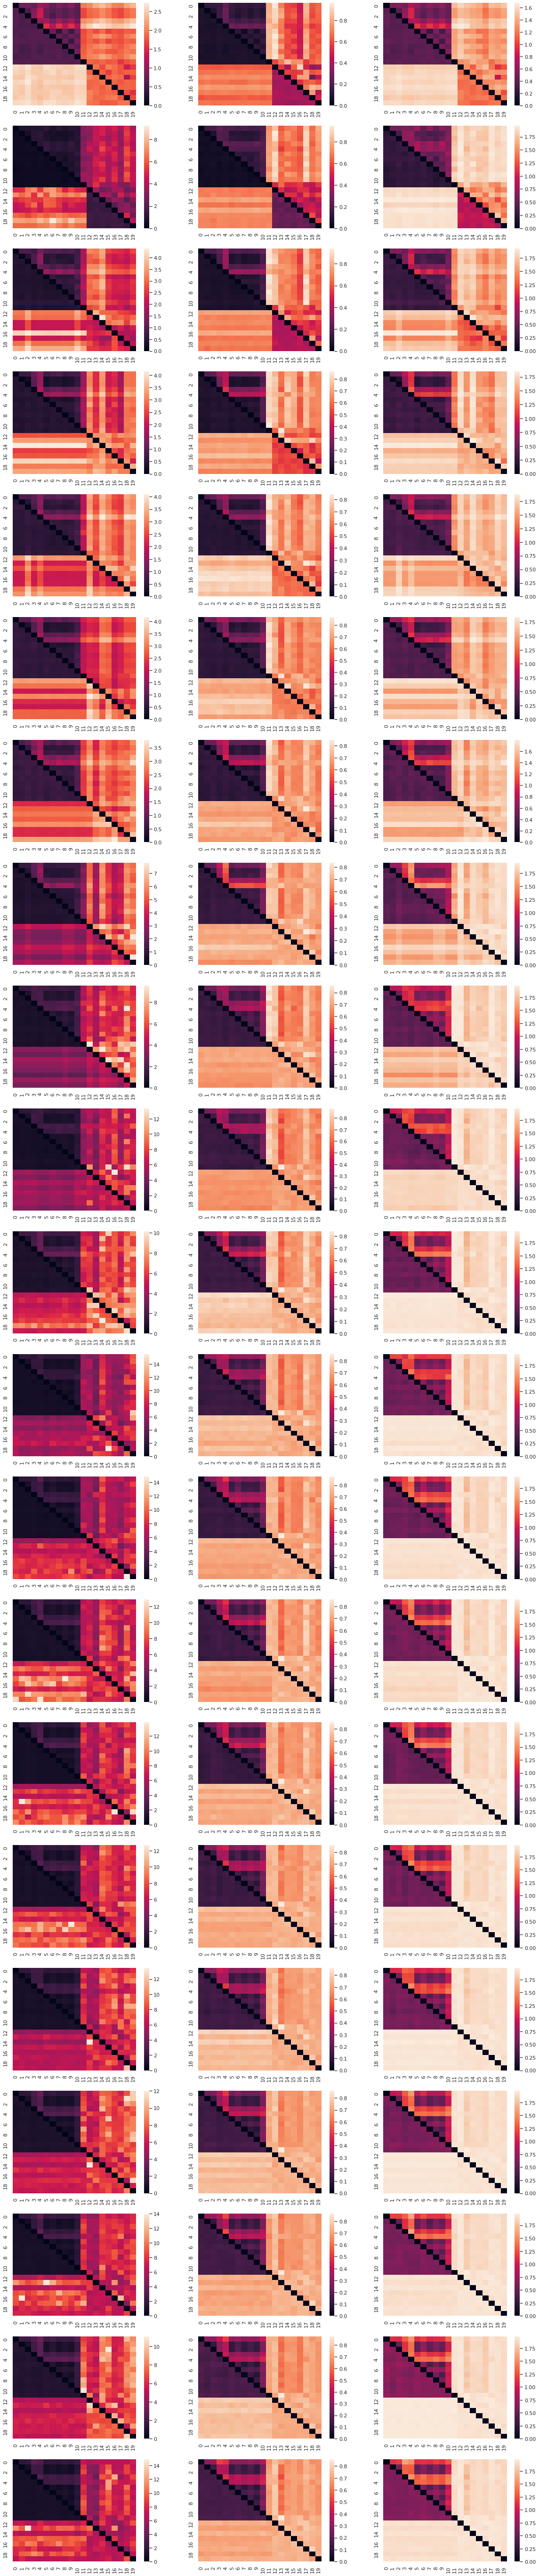

In [18]:
import torch
import cv2
from sklearn import metrics
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

def imgToVec(img_path):
    img = cv2.imread(img_path)
    img = torch.Tensor(img).view(-1)
    tt = torch.where(img==0,torch.full_like(img,-1),img)
    tt = torch.where(img==255,torch.full_like(img,1),tt)
    tt = torch.where(img==125,torch.full_like(img,0),tt)
    tt = tt[:62006]
    return tt.tolist()

def distNMI(A,B):
    return torch.tensor(metrics.normalized_mutual_info_score(A,B))

def distCos(A,B):
    return (1+torch.cosine_similarity(A,B,dim=0))/2

def distJoint(A,B):
    if type(A)!=torch.Tensor:
        A = torch.Tensor(A)
    if type(B)!=torch.Tensor:
        B = torch.Tensor(B)
    nmi = distNMI(A,B)
    cos = distCos(A,B)
    return -1*torch.log(nmi),-1*torch.log(cos),-1*torch.log(0.7*nmi + 0.3*cos)
    # return -1*torch.log(0.7*distNMI(A,B) + 0.3*distCos(A,B))

def comM(vec_list):
    W = torch.tensor(vec_list)
    M1 =np.random.rand(len(W),len(W))
    M2 =np.random.rand(len(W),len(W))
    M3 =np.random.rand(len(W),len(W))

    for i in range(len(W)):
        for j in range(i,len(W)):
            tmp1,tmp2,tmp3 = distJoint(W[i],W[j])
            M1[i][j]=tmp1
            M2[i][j]=tmp2
            M3[i][j]=tmp3
            if i!=j:
                M1[j][i]=M1[i][j]
                M2[j][i]=M2[i][j]
                M3[j][i]=M3[i][j]

    return M1,M2,M3

def jointM(m1,m2):
    m =np.random.rand(len(m1),len(m1))
    for i in range(len(m1)):
        for j in range(len(m1[i])):
            if i >=j:
                m[i][j] = m1[i][j]
            else:
                m[i][j] = m2[i][j]
    return m



ex_path_iid = '/mnt/result/weightimg/ex_CFDP73_label_12_1/iid/'
ex_path_noniid = '/mnt/result/weightimg/ex_CFDP73_label_12_1/noniid/'
f, axs = plt.subplots(21,3,figsize=(20,5*20))
i=0
for r in [i for i in range(1,201) if i%10==0 or i==1]:
    print('round {} M'.format(r))
    imgs_path_iid = [ex_path_iid + str(r) + '/' + 'client:'+ str(i) + '.png' for i in range(20) ]
    vec_list_iid = [imgToVec(img) for img in imgs_path_iid]
    imgs_path_noniid = [ex_path_noniid + str(r) + '/' + 'client:'+ str(i) + '.png' for i in range(20) ]
    vec_list_noniid = [imgToVec(img) for img in imgs_path_noniid]

    M_iid,M1_iid,M2_iid = comM(vec_list_iid)
    M_noniid,M1_noniid,M2_noniid = comM(vec_list_noniid)
    M,M1,M2 = jointM(M_iid,M_noniid),jointM(M1_iid,M1_noniid),jointM(M2_iid,M2_noniid)
    # M = comM(vec_list)
    # sns.heatmap(M)
    sns.heatmap(M,ax=axs[i][0])
    sns.heatmap(M1,ax=axs[i][1])
    sns.heatmap(M2,ax=axs[i][2])
    i = i+1
plt.show()
